<a href="https://colab.research.google.com/github/rathoreashish146/Flood-Stage-Prediction-System/blob/main/Bi_GRU_and_LSTM_on_sweetwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
!sudo pip3 install keras

from tensorflow.python.keras.engine.sequential import Sequential

from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM ,Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from matplotlib import pyplot
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#first we take columbus data set
# data = pd.read_csv('/content/chattahoochee-columbus.csv')

#first we take sweetwater creek data set
data = pd.read_csv('/content/SWEETWATER CREEK.csv')

In [ ]:
data.head()

,time,height
0,1/1/2015 0:00,2.65
1,1/1/2015 0:15,2.64
2,1/1/2015 0:30,2.64
3,1/1/2015 0:45,2.62
4,1/1/2015 1:00,2.58


In [ ]:
data.shape

(245630, 2)

In [ ]:
print("Start: ", data['time'].min())
print("End: ", data['time'].max())

Start:  1/1/2015 0:00
End:  9/9/2021 9:45


In [ ]:
data[['date', 'Only_time']] = data['time'].str.split(' ', 1, expand=True)

<ipython-input-39-8490a75142d0>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['date', 'Only_time']] = data['time'].str.split(' ', 1, expand=True)


In [ ]:
data.head()

,time,height,date,Only_time
0,1/1/2015 0:00,2.65,1/1/2015,0:00
1,1/1/2015 0:15,2.64,1/1/2015,0:15
2,1/1/2015 0:30,2.64,1/1/2015,0:30
3,1/1/2015 0:45,2.62,1/1/2015,0:45
4,1/1/2015 1:00,2.58,1/1/2015,1:00


In [ ]:
data = data.drop(labels=['time'],axis=1)

In [ ]:
data.head()

,height,date,Only_time
0,2.65,1/1/2015,0:00
1,2.64,1/1/2015,0:15
2,2.64,1/1/2015,0:30
3,2.62,1/1/2015,0:45
4,2.58,1/1/2015,1:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245630 entries, 0 to 245629
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   height     245630 non-null  float64
 1   date       245630 non-null  object 
 2   Only_time  245630 non-null  object 
dtypes: float64(1), object(2)
memory usage: 5.6+ MB


In [ ]:
data.describe()

,height
count,245630.000000
mean,2.190667
std,1.605342
min,-0.260000
25%,1.350000
50%,1.840000
75%,2.450000
max,12.600000


In [ ]:
data.isnull().sum()

height       0
date         0
Only_time    0
dtype: int64

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data['Only_time'] = pd.to_datetime(data['Only_time'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245630 entries, 0 to 245629
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   height     245630 non-null  float64       
 1   date       245630 non-null  datetime64[ns]
 2   Only_time  245630 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 5.6 MB


In [ ]:
data.head()

,height,date,Only_time
0,2.65,2015-01-01,2023-06-22 00:00:00
1,2.64,2015-01-01,2023-06-22 00:15:00
2,2.64,2015-01-01,2023-06-22 00:30:00
3,2.62,2015-01-01,2023-06-22 00:45:00
4,2.58,2015-01-01,2023-06-22 01:00:00


In [ ]:
# Not converting into seperate columns
df = pd.read_csv('/content/SWEETWATER CREEK.csv')

In [ ]:
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df.head()

,time,height
0,2015-01-01 00:00:00,2.65
1,2015-01-01 00:15:00,2.64
2,2015-01-01 00:30:00,2.64
3,2015-01-01 00:45:00,2.62
4,2015-01-01 01:00:00,2.58


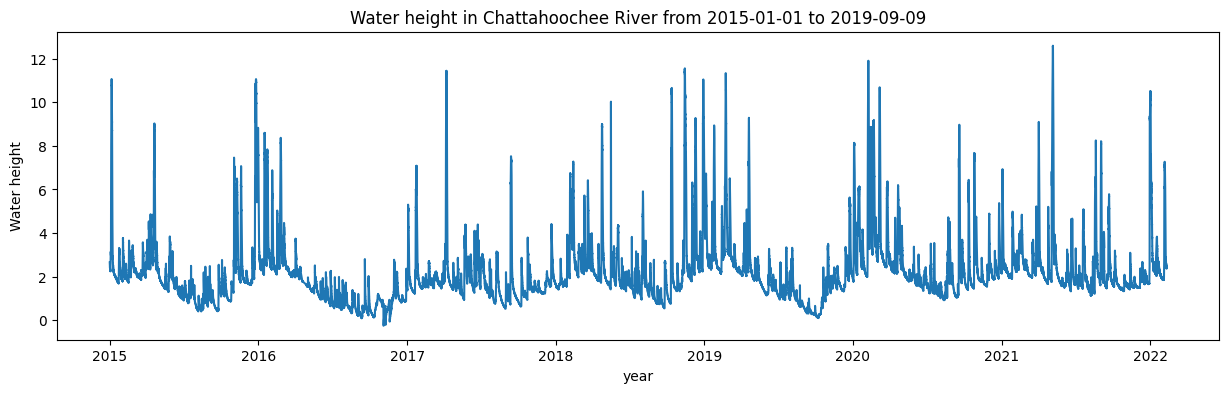

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(df['time'],df['height'])
plt.gca().set(title='Water height in Chattahoochee River from 2015-01-01 to 2019-09-09', xlabel='year', ylabel='Water height')
plt.show()

<Axes: >

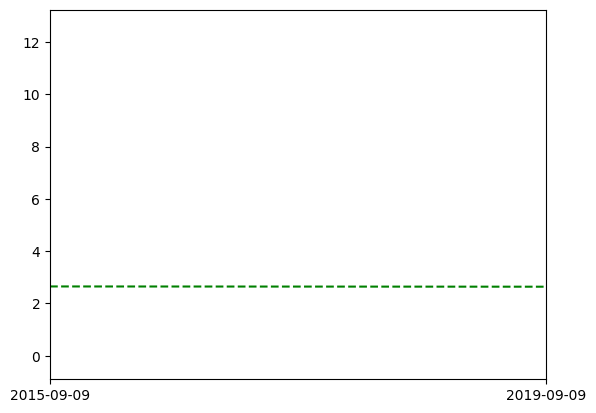

In [ ]:
df['height'].plot(xlim=['2015-09-09','2019-09-09'],ls='--',c='green')

In [ ]:
df.index

RangeIndex(start=0, stop=245630, step=1)

In [ ]:
# df.head()

In [ ]:
df = df.set_index('time',drop=True)

<Axes: xlabel='time'>

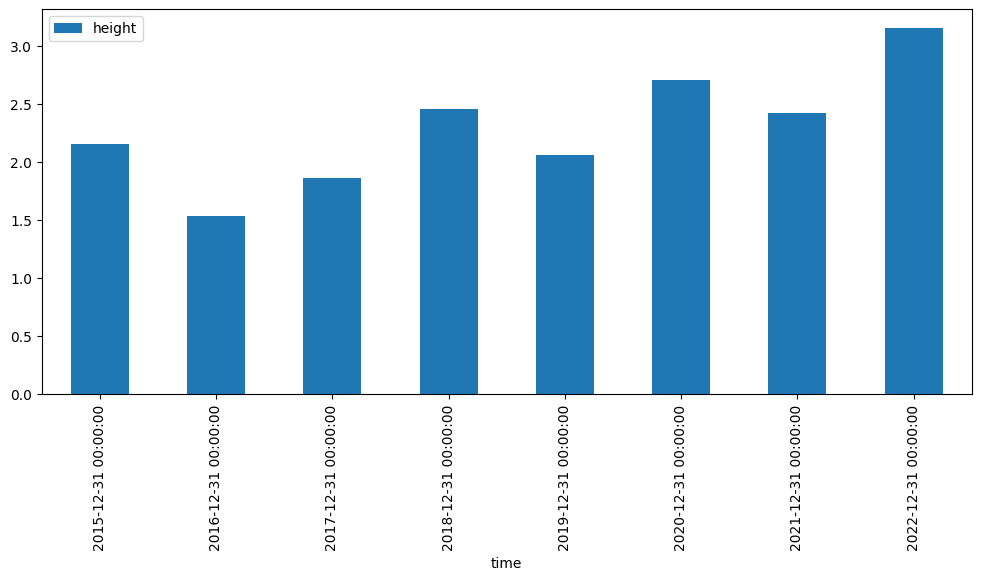

In [ ]:
df.resample(rule='A').mean().plot(kind='bar',figsize=(12,5))

In [ ]:
 #Extracting features from date and time this way creating  new features.
data['Month'] = [i.month for i in data['date']]
data['Year'] = [i.year for i in data['date']]
data['day'] = [i.day for i in data['date']]
data['Hour'] = [i.hour for i in data['Only_time']]
data['Minute'] = [i.minute for i in data['Only_time']]
data['Second'] = [i.second for i in data['Only_time']]
#drop unnecessary  columns and re-arrange
data.drop('Minute',axis=1, inplace=True)
data.drop('Second',axis=1, inplace=True)
data = data[['Year', 'Month', 'day', 'Hour', 'height']]
data

,Year,Month,day,Hour,height
0,2015,1,1,0,2.65
1,2015,1,1,0,2.64
2,2015,1,1,0,2.64
3,2015,1,1,0,2.62
4,2015,1,1,1,2.58
...,...,...,...,...,...
245625,2022,2,9,15,2.39
245626,2022,2,9,16,2.36
245627,2022,2,9,16,2.37
245628,2022,2,9,16,2.40


In [ ]:
#create a dataframe that contains water level/height values at 't'
temps = DataFrame(data['height'].values)
# shift forward and concatenate with data
temps_shift = concat([temps.shift(1, axis = 0),temps], axis=1)
data = concat([data, temps_shift], axis=1)
#drop repeated column
data.drop('height',axis=1, inplace=True)
#re-arrange
data.columns = ['Year', 'Month', 'day', 'Hour','t', 't+1']
#drop the first row with NaN value
data.dropna(axis=0, inplace=True)
data

,Year,Month,day,Hour,t,t+1
1,2015,1,1,0,2.65,2.64
2,2015,1,1,0,2.64,2.64
3,2015,1,1,0,2.64,2.62
4,2015,1,1,1,2.62,2.58
5,2015,1,1,1,2.58,2.62
...,...,...,...,...,...,...
245625,2022,2,9,15,2.41,2.39
245626,2022,2,9,16,2.39,2.36
245627,2022,2,9,16,2.36,2.37
245628,2022,2,9,16,2.37,2.40


In [ ]:
train = data[data['Year'] <= 2018]
valid = data[(data['Year'] > 2018) & (data['Year'] < 2020)]
test = data[data['Year'] >= 2020]

In [ ]:
#Separating the input and output variables
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
valid_X = valid.iloc[:,:-1]
valid_y = valid.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [ ]:
train_X = train_X.values
print('train_X shape:', train_X.shape)
train_y = train_y.values
print('train_y shape:', train_y.shape)
valid_X = valid_X.values
print('valid_X shape:', valid_X.shape)
valid_y = valid_y.values
print('valid_y shape:', valid_y.shape)
test_X = test_X.values
print('test_X shape:', test_X.shape)
test_y = test_y.values
print('test_y shape:', test_y.shape)

train_X shape: (137549, 5)
train_y shape: (137549,)
valid_X shape: (34789, 5)
valid_y shape: (34789,)
test_X shape: (73291, 5)
test_y shape: (73291,)


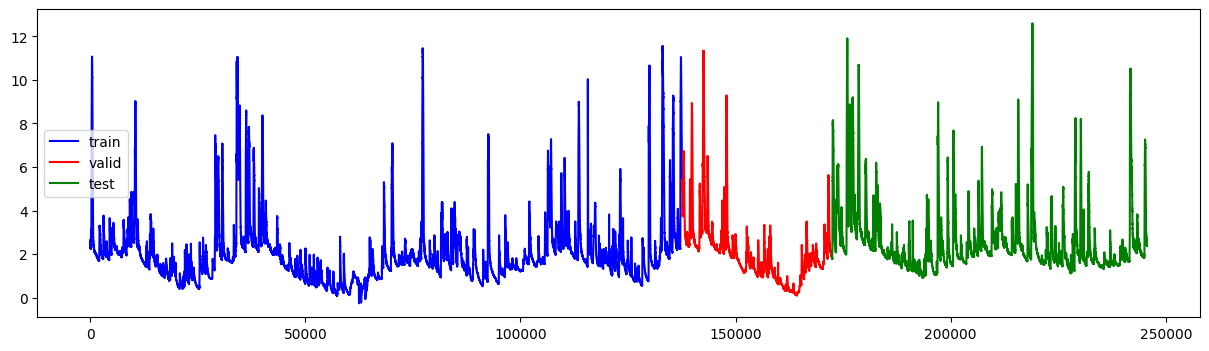

In [ ]:
#plot the distribution of train /valid/ test samples
x1=np.arange(0,137549)
x2 = np.arange(137549,172338)
x3 = np.arange(172338,245629)
plt.figure(figsize=(15,4), dpi=100)
plt.plot(x1,train_y,'b',label='train')
plt.plot(x2, valid_y, 'r', label='valid')
plt.plot(x3,test_y,'g',label='test')
plt.legend(loc='best')

In [ ]:
#reshape the train/valid/test datasets as it matche the CNN input
train_Xcnn = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
valid_Xcnn = valid_X.reshape((valid_X.shape[0], valid_X.shape[1], 1))
test_Xcnn = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))
print('Train set shape', train_Xcnn.shape)
print('Validation set shape', valid_Xcnn.shape)
print('Validation set shape', test_Xcnn.shape)


Train set shape (137549, 5, 1)
Validation set shape (34789, 5, 1)
Validation set shape (73291, 5, 1)


In [ ]:
!pip install keras-tuner


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from kerastuner.tuners import RandomSearch
from sklearn.metrics import mean_squared_error, mean_absolute_error

<ipython-input-68-d471313bbc5c>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

class AttentionLayer(layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weights', shape=(input_shape[-1], 1), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1), initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        e = tf.keras.backend.dot(inputs, self.W) + self.b
        a = tf.keras.activations.softmax(e, axis=1)
        output = inputs * a
        return tf.reduce_sum(output, axis=1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

class AttentionLayer(layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weights', shape=(input_shape[-1], 1), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1), initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        e = tf.keras.backend.dot(inputs, self.W) + self.b
        a = tf.keras.activations.softmax(e, axis=1)
        output = inputs * a
        return tf.reduce_sum(output, axis=1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense
from kerastuner.tuners import RandomSearch
from sklearn.metrics import mean_squared_error, mean_absolute_error

model_lstm_bi_gru = Sequential()

# First LSTM layer with Dropout regularisation
model_lstm_bi_gru.add(LSTM(units=64, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_lstm_bi_gru.add(Dropout(0.2))

# Second LSTM layer
model_lstm_bi_gru.add(LSTM(units=64, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_lstm_bi_gru.add(Dropout(0.2))

# Third LSTM layer
model_lstm_bi_gru.add(LSTM(units=32, return_sequences=True, input_shape=(train_Xcnn.shape[1], train_Xcnn.shape[2]), activation='tanh'))
model_lstm_bi_gru.add(Dropout(0.2))

# Fourth Bidirectional GRU layer
model_lstm_bi_gru.add(Bidirectional(GRU(units=16, activation='tanh')))
model_lstm_bi_gru.add(Dropout(0.2))

# The output layer
model_lstm_bi_gru.add(Dense(units=1))

# Add Attention layer
model_lstm_bi_gru.add(AttentionLayer())

model_lstm_bi_gru.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model_lstm_bi_gru.summary()

cnn_lstm_attention_history = model_lstm_bi_gru.fit(train_Xcnn, train_y, epochs=5, verbose=2, batch_size=64)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 64)             33024     
                                                                 
 dropout_1 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 5, 32)             12416     
                                                                 
 dropout_2 (Dropout)         (None, 5, 32)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4

In [ ]:
cnn_lstm_history = model_lstm_bi_gru.fit(train_Xcnn, train_y, epochs=5, verbose=2, batch_size=64)

Epoch 1/5
2150/2150 - 21s - loss: 0.0540 - mse: 0.0540 - mae: 0.1464 - 21s/epoch - 10ms/step
Epoch 2/5
2150/2150 - 20s - loss: 0.0483 - mse: 0.0483 - mae: 0.1385 - 20s/epoch - 9ms/step
Epoch 3/5
2150/2150 - 20s - loss: 0.0454 - mse: 0.0454 - mae: 0.1332 - 20s/epoch - 10ms/step
Epoch 4/5
2150/2150 - 19s - loss: 0.0432 - mse: 0.0432 - mae: 0.1299 - 19s/epoch - 9ms/step
Epoch 5/5
2150/2150 - 21s - loss: 0.0417 - mse: 0.0417 - mae: 0.1270 - 21s/epoch - 10ms/step


In [ ]:
cnn_lstm_history.history.keys()

dict_keys(['loss', 'mse', 'mae'])

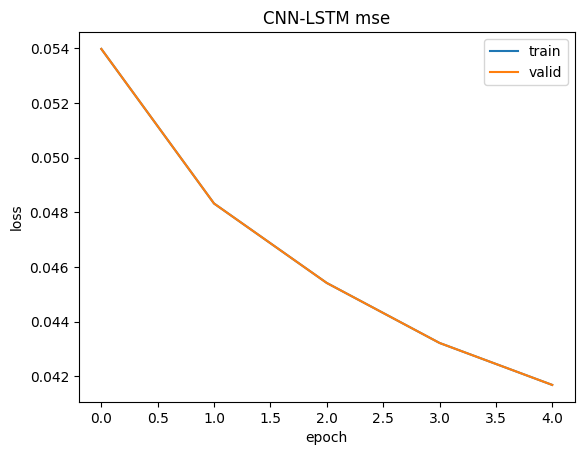

In [ ]:
# summarize history for loss
plt.plot(cnn_lstm_history.history['mse'])
plt.plot(cnn_lstm_history.history['mse'])
plt.title('CNN-LSTM mse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

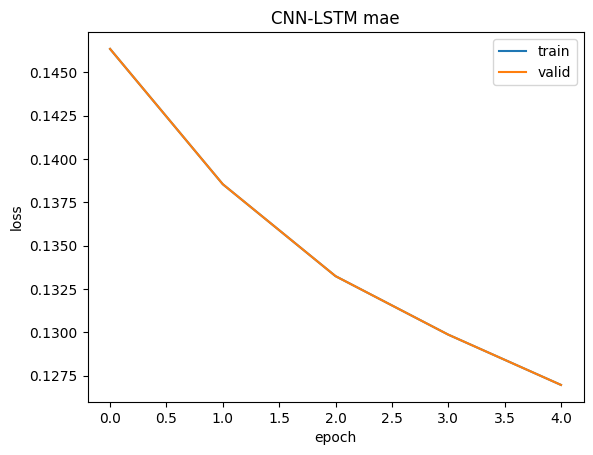

In [ ]:
# summarize history for loss
plt.plot(cnn_lstm_history.history['mae'])
plt.plot(cnn_lstm_history.history['mae'])
plt.title('CNN-LSTM mae')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
cnn_lstm_train_pred = model_lstm_bi_gru.predict(train_Xcnn)
cnn_lstm_valid_pred = model_lstm_bi_gru.predict(valid_Xcnn)
cnn_lstm_test_pred = model_lstm_bi_gru.predict(test_Xcnn)
print('Error in Next 6-hour prediction of water level using CNN')
print('Train rmse:', np.sqrt(mean_squared_error(train_y[50:56],cnn_lstm_train_pred[50:56])))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y[50:56], cnn_lstm_valid_pred[50:56])))
print('Test rmse:', np.sqrt(mean_squared_error(test_y[50:56], cnn_lstm_test_pred[50:56])))
print('Test mae :', metrics.mean_absolute_error(test_y[50:56], cnn_lstm_test_pred[50:56]))
print('Test mse :', metrics.mean_squared_error(test_y[50:56], cnn_lstm_test_pred[50:56]))
print('**********************************************************************')
# def wape(actual, forecast):
#     return np.sum(np.abs(actual - forecast)) / np.sum(actual) * 100

# def nse(actual, forecast):
#     return 1 - np.sum((forecast - actual) ** 2) / np.sum((actual - np.mean(actual)) ** 2)
# wape_score = wape(test_y, cnn_lstm_test_pred)
# nse_score = nse(test_y, cnn_lstm_test_pred)

# print(f"Test WAPE: {wape_score:.2f}%")
# print(f"Test NSE: {nse_score:.4f}")

2291/2291 [==============================] - 10s 4ms/step
Error in Next 6-hour prediction of water level using CNN
Train rmse: 0.03091581770111284
Validation rmse: 0.21196610693535708
Test rmse: 0.052358050819203805
Test mae : 0.050591428279876616
Test mse : 0.0027413654855863285
**********************************************************************


2291/2291 [==============================] - 10s 4ms/step


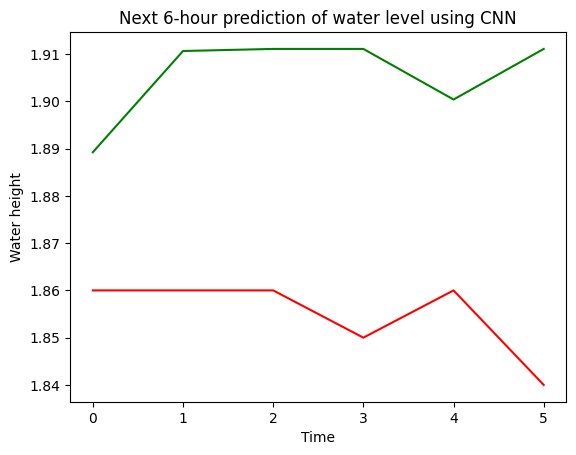

In [ ]:
# Plot the graph between actual vs predicted values
y_pred = model_lstm_bi_gru.predict(test_Xcnn)
plt.plot(y_pred[50:56], color='green')
plt.plot(test_y[50:56].flatten(), color='red')
plt.title("Next 6-hour prediction of water level using CNN")
plt.xlabel("Time")
plt.ylabel("Water height")
plt.show()

In [ ]:
from keras import backend as K
from sklearn.metrics import r2_score

y_pred = model_lstm_bi_gru.predict(test_Xcnn)

r2 = r2_score(cnn_lstm_test_pred[50:56], test_y[50:56])
print('r2 score for 6 Hour Prediction of this perfect model is', r2)

2291/2291 [==============================] - 10s 4ms/step
r2 score for 6 Hour Prediction of this perfect model is -39.00739509240662


In [ ]:
cnn_lstm_train_pred = model_lstm_bi_gru.predict(train_Xcnn)
cnn_lstm_valid_pred = model_lstm_bi_gru.predict(valid_Xcnn)
cnn_lstm_test_pred = model_lstm_bi_gru.predict(test_Xcnn)
print('Error in Next 12-hour prediction of water level using CNN')
print('Train rmse:', np.sqrt(mean_squared_error(train_y[50:62],cnn_lstm_train_pred[50:62])))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y[50:62], cnn_lstm_valid_pred[50:62])))
print('Test rmse:', np.sqrt(mean_squared_error(test_y[50:62], cnn_lstm_test_pred[50:62])))
print('Test mae :', metrics.mean_absolute_error(test_y[50:62], cnn_lstm_test_pred[50:62]))
print('Test mse :', metrics.mean_squared_error(test_y[50:62], cnn_lstm_test_pred[50:62]))
print('**********************************************************************')
# def wape(actual, forecast):
#     return np.sum(np.abs(actual - forecast)) / np.sum(actual) * 100

# def nse(actual, forecast):
#     return 1 - np.sum((forecast - actual) ** 2) / np.sum((actual - np.mean(actual)) ** 2)
# wape_score = wape(test_y, cnn_lstm_test_pred)
# nse_score = nse(test_y, cnn_lstm_test_pred)

# print(f"Test WAPE: {wape_score:.2f}%")
# print(f"Test NSE: {nse_score:.4f}")

2291/2291 [==============================] - 10s 4ms/step
Error in Next 12-hour prediction of water level using CNN
Train rmse: 0.029366316745609113
Validation rmse: 0.2128817103511453
Test rmse: 0.05170894226409866
Test mae : 0.05046032269795727
Test mse : 0.002673814710071889
**********************************************************************


2291/2291 [==============================] - 10s 4ms/step


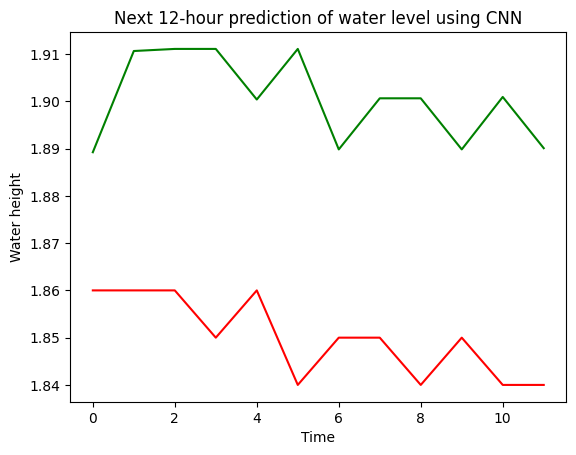

In [ ]:
# Plot the graph between actual vs predicted values
y_pred = model_lstm_bi_gru.predict(test_Xcnn)
plt.plot(y_pred[50:62], color='green')
plt.plot(test_y[50:62].flatten(), color='red')
plt.title("Next 12-hour prediction of water level using CNN")
plt.xlabel("Time")
plt.ylabel("Water height")
plt.show()

In [ ]:
from keras import backend as K
from sklearn.metrics import r2_score

y_pred = model_lstm_bi_gru.predict(test_Xcnn)

r2 = r2_score(cnn_lstm_test_pred[50:62], test_y[50:62])
print('r2 score for 12 Hour Prediction of this perfect model is', r2)

In [ ]:
cnn_lstm_train_pred = model_lstm_bi_gru.predict(train_Xcnn)
cnn_lstm_valid_pred = model_lstm_bi_gru.predict(valid_Xcnn)
cnn_lstm_test_pred = model_lstm_bi_gru.predict(test_Xcnn)
print('Error in Next 24-hour prediction of water level using CNN')
print('Train rmse:', np.sqrt(mean_squared_error(train_y[50:74],cnn_lstm_train_pred[50:74])))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y[50:74], cnn_lstm_valid_pred[50:74])))
print('Test rmse:', np.sqrt(mean_squared_error(test_y[50:74], cnn_lstm_test_pred[50:74])))
print('Test mae :', metrics.mean_absolute_error(test_y[50:74], cnn_lstm_test_pred[50:74]))
print('Test mse :', metrics.mean_squared_error(test_y[50:74], cnn_lstm_test_pred[50:74]))
print('**********************************************************************')


2291/2291 [==============================] - 9s 4ms/step
Error in Next 24-hour prediction of water level using CNN
Train rmse: 0.032780716176435555
Validation rmse: 0.20941943415227152
Test rmse: 0.05189148131548004
Test mae : 0.05096360166867566
Test mse : 0.0026927258331148145
**********************************************************************


2291/2291 [==============================] - 11s 5ms/step


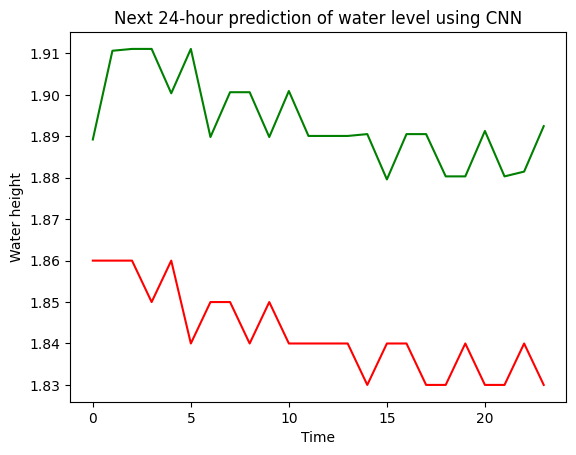

In [ ]:
# Plot the graph between actual vs predicted values
y_pred = model_lstm_bi_gru.predict(test_Xcnn)
plt.plot(y_pred[50:74], color='green')
plt.plot(test_y[50:74].flatten(), color='red')
plt.title("Next 24-hour prediction of water level using CNN")
plt.xlabel("Time")
plt.ylabel("Water height")
plt.show()

In [ ]:
from keras import backend as K
from sklearn.metrics import r2_score

y_pred = model_lstm_bi_gru.predict(test_Xcnn)

r2 = r2_score(cnn_lstm_test_pred[50:74], test_y[50:74])
print('r2 score for 24 Hour Prediction of this perfect model is', r2)

2291/2291 [==============================] - 11s 5ms/step
r2 score for 24 Hour Prediction of this perfect model is -25.951763112448322


In [ ]:
cnn_lstm_train_pred = model_lstm_bi_gru.predict(train_Xcnn)
cnn_lstm_valid_pred = model_lstm_bi_gru.predict(valid_Xcnn)
cnn_lstm_test_pred = model_lstm_bi_gru.predict(test_Xcnn)
print('Error in Next 48-hour prediction of water level using CNN')
print('Train rmse:', np.sqrt(mean_squared_error(train_y[50:98],cnn_lstm_train_pred[50:98])))
print('Validation rmse:', np.sqrt(mean_squared_error(valid_y[50:98], cnn_lstm_valid_pred[50:98])))
print('Test rmse:', np.sqrt(mean_squared_error(test_y[50:98], cnn_lstm_test_pred[50:98])))
print('Test mae :', metrics.mean_absolute_error(test_y[50:98], cnn_lstm_test_pred[50:98]))
print('Test mse :', metrics.mean_squared_error(test_y[50:98], cnn_lstm_test_pred[50:98]))
print('**********************************************************************')


2291/2291 [==============================] - 10s 4ms/step
Error in Next 48-hour prediction of water level using CNN
Train rmse: 0.03759152491449903
Validation rmse: 0.19366678866291676
Test rmse: 0.05416963062009034
Test mae : 0.05257743547360095
Test mse : 0.002934348881517029
**********************************************************************


2291/2291 [==============================] - 10s 4ms/step


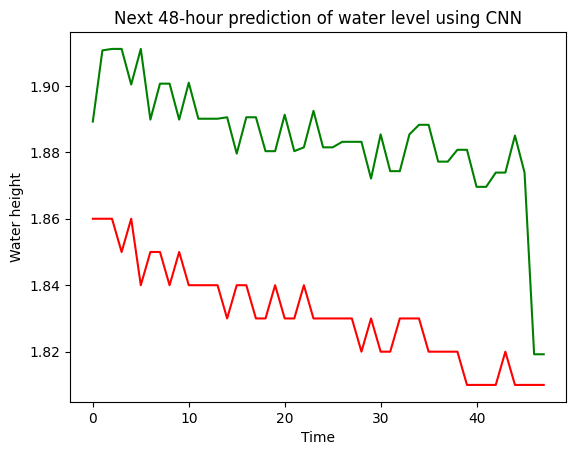

In [ ]:
# Plot the graph between actual vs predicted values
y_pred = model_lstm_bi_gru.predict(test_Xcnn)
plt.plot(y_pred[50:98], color='green')
plt.plot(test_y[50:98].flatten(), color='red')
plt.title("Next 48-hour prediction of water level using CNN")
plt.xlabel("Time")
plt.ylabel("Water height")
plt.show()

In [ ]:
from keras import backend as K
from sklearn.metrics import r2_score

y_pred = model_lstm_bi_gru.predict(test_Xcnn)

r2 = r2_score(cnn_lstm_test_pred[50:98], test_y[50:98])
print('r2 score for 48 Hour Prediction of this perfect model is', r2)

2291/2291 [==============================] - 10s 4ms/step
r2 score for 48 Hour Prediction of this perfect model is -8.946761698084936
